## Final Classification Notebook

In [15]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
# Loading the dataset
data_path = 'data.csv'
data = pd.read_csv(data_path)

#### Data Exploration

In [10]:
# Looking at the first 5 rows of the dataset and it's summary

data_head = data.head()
data_describe = data.describe()

data_head, data_describe

(   id                                            comment  score  sentiment
 0   1               What happened to sevilla, seriously?      1          0
 1   2           is tom huddlestone right or left footed?      1          0
 2   3  How highly rated was Deivid Washington at Sant...      1          0
 3   4  Yeah I thought you guys would go for more high...      1          0
 4   5  Never judge a player based on such limited gam...      1          0,
                  id         score     sentiment
 count  19282.000000  19282.000000  19282.000000
 mean    9641.500000      7.424800      0.162379
 std     5566.378281     44.088514      0.368808
 min        1.000000   -139.000000      0.000000
 25%     4821.250000      1.000000      0.000000
 50%     9641.500000      3.000000      0.000000
 75%    14461.750000      6.000000      0.000000
 max    19282.000000   2663.000000      1.000000)

In [11]:
# Looking at the value count and therefore the balance of classes

data_count = data['sentiment'].value_counts()

data_count

sentiment
0    16151
1     3131
Name: count, dtype: int64

In [9]:
# Checks to see if there are any missing values

missing_values = data.isnull().sum()

missing_values

id           0
comment      0
score        0
sentiment    0
dtype: int64

Next we will take a look at whether the score (the sum of upvotes and downvotes on a comment) shows any correlation whether it's harmful or not

In [12]:
correlation = data['score'].corr(data['sentiment'])

print(f"Correlation coefficient between score and sentiment: {correlation}")

Correlation coefficient between score and sentiment: 0.0050873506620956145


The result shows that there is no real relationship between score and sentiment, showing that harmful comments could equally be upvoted as much as downvoted. We can visualise this further with a scatter plot, where we can see both 0 or 1 sentiment typically sits in the same area in respect to it's score

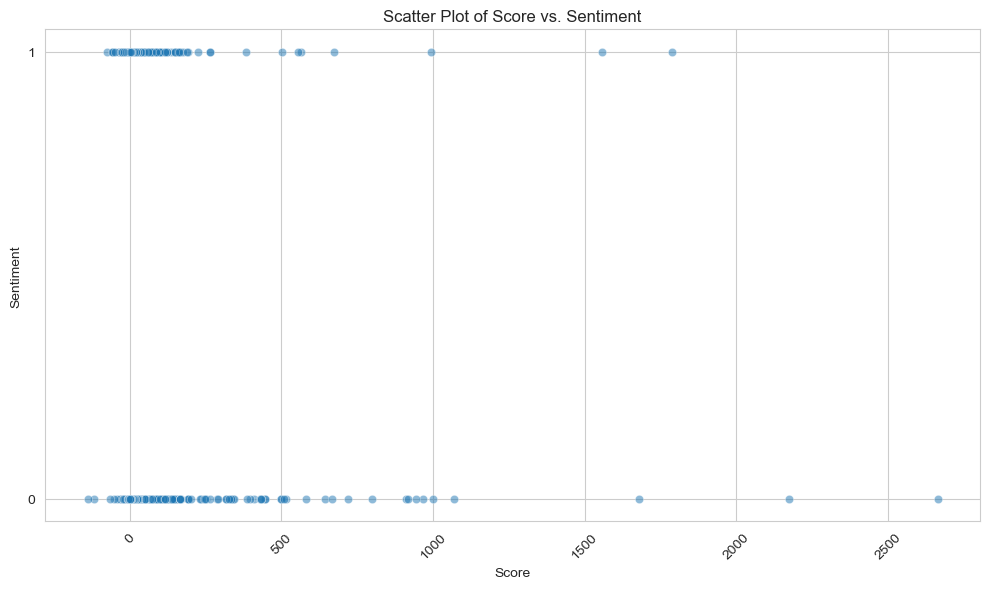

In [14]:
# Creating a scatter plot to show the weak connection

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='score', y='sentiment', data=data, alpha=0.5)

plt.title('Scatter Plot of Score vs. Sentiment')
plt.xlabel('Score')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)  # Rotates the x-axis labels 
plt.yticks([0, 1])
plt.tight_layout()  

plt.show()

We should now split the dataset into our training and test sets. Doing so this early, ensures we don't learn too much about our data in the way of patterns already to decrease our chance of overfitting and to avoid data snooping bias.

In [16]:
# 'X' will be used for features and 'y' is the target variable
X = data.drop('sentiment', axis=1)  # Removing the target column from the feature set
y = data['sentiment']  

In [17]:
# First split to separate out the test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split to separate out the validation set from the training set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

We now have the following sets:

- X_train, y_train: Training set
- X_val, y_val: Validation set
- X_test, y_test: Test set